You've been given a file helpfully named `fakeData.txt`. Your mission, should you choose to accept it, is to:

- Read in that file
- Seperate it into two sets using the "bad" column (-1 means bad)
- Plot the good data
- Plot the bad data using "X"s to clearly denote it
- Fit a line to the data using an appropriate polynomial function

You should accept the mission, it is a completion grade. The purpose of this assignment is to see how much you remember from your intro to programming class, and to see if you developed and very good or very bad habits. Please do your best to demonstrate good habits! (e.g., descriptive variable names, readable code, maybe even proper PEP 8 coding style!)

You may use any resources at your disposal, except your friends please. I want to see what **YOU** remember. But your textbook, the internet, any lecture notes or homework you have from your previous all, are all free game as reference for this assignment. Just try to avoid copy-pasting too much (I'll be able to tell).

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

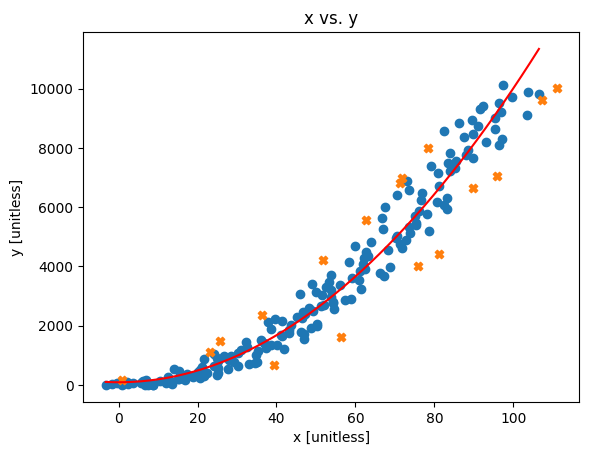

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xdata = []  #create an empty list for x data
ydata = []  #create an empty list for y data
bad = []    #create an empty list for bad data

fakeData = open("fakeData.txt","r") #open fakeData.txt and assign it to variable fakeData
next(fakeData)  #skip the first line (header)
for line in fakeData:
    line = line.strip() #strip each line of empty spaces. 
                        #I had to include this line because I was getting an issue where the bad data would include a "\n" next to every number from the "bad" column.
    columns = line.split(',')   #split each line into 3 columns
    xdata.append(float(columns[0])) #append x column values
    ydata.append(float(columns[1])) #append y column values
    bad.append(int(columns[2])) #append bad column values

xdata = np.array(xdata) #convert all list into numpy arrays in order to more easily mask data
ydata = np.array(ydata)
bad = np.array(bad)

mask = (bad != -1)  #create a mask for the bad data, bad data is denoted with a -1

xdata_m = xdata[mask]   #mask x and y data removing the bad data
ydata_m = ydata[mask]

def poly2(x,a,b):   #define a 2nd order polynomial function. I chose this function by observing the shape of the scatter plot. 
    return a * x**2 + b
popt, pcov = curve_fit(poly2, xdata_m, ydata_m) #use the curve_fit function to find optimized values of a and b from the poly2 function

x_lin = np.linspace(min(xdata_m),max(xdata_m))  #create a linspace from the minimum to maximum x values

fig = plt.figure()  #initialize a figure variable
fig, ax = plt.subplots()    #create a subplot in the figure
ax.scatter(xdata_m,ydata_m) #scatter the masked x and y values
ax.scatter(xdata[~mask],ydata[~mask], marker='X')   #scatter the bad values from the x and y data and mark them with an "X"
ax.plot(x_lin,poly2(x_lin,popt[0],popt[1]),'r') #plot the fitted poly2 curve with optimized parameters
ax.set_title("x vs. y") #make a title for the plot
ax.set_xlabel("x [unitless]")   #make a x-axis label
ax.set_ylabel("y [unitless]")   #make a y-axis label
plt.show


